In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def euler(f,t,y,h):
    return y + h * f(t, y)

def heun(f,t,y,h):
    k1 = f(t, y)
    k2 = f(t + h, y + h*k1)
    return y + h*1/2*(k1 + k2) 

def rk3(f,t,y,h):
    k1 = f(t, y)
    k2 = f(t + 1/2*h, y + h*1/2*k1)
    k3 = f(t + 3/4 *h, y + h*3/4 *k2)
    return y + h*(2/9 * k1 + 1/3 * k2 + 4/9 * k3)

def f(t,y):
    return -t*y**2
    

In [3]:
"""
N = 10
h = 0.1
t0 = 0 
y0 = 1 
y_e = np.zeros(N);y_heun = np.zeros(N);y_rk3 = np.zeros(N)
y_e[0] = y0; y_heun[0] = y0; y_rk3[0] = y0
t = np.linspace(0, h*N, N)
y = 2/(2 + t**2)
for i in range(N-1):
    y_e[i+1] = euler(f,t[i], y_e[i], h)
    y_heun[i+1] = heun(f,t[i], y_heun[i], h)
    y_rk3[i+1] = rk3(f,t[i], y_rk3[i], h)

plt.plot(t, y_e,'r', label = 'Euler')
plt.plot(t, y_heun,'b', label = 'Heun')
plt.plot(t, y_rk3, 'g',label = 'RK3 ')
plt.plot(t, y, label = 'Normal')
plt.legend()
print(f'Feil for euler: {abs(y_e[-1] - y[-1])}')
print(f'Feil for Heun: {abs(y_heun[-1] - y[-1])}')
print(f'Feil for RK3: {abs(y_rk3[-1] - y[-1])}')
"""

"\nN = 10\nh = 0.1\nt0 = 0 \ny0 = 1 \ny_e = np.zeros(N);y_heun = np.zeros(N);y_rk3 = np.zeros(N)\ny_e[0] = y0; y_heun[0] = y0; y_rk3[0] = y0\nt = np.linspace(0, h*N, N)\ny = 2/(2 + t**2)\nfor i in range(N-1):\n    y_e[i+1] = euler(f,t[i], y_e[i], h)\n    y_heun[i+1] = heun(f,t[i], y_heun[i], h)\n    y_rk3[i+1] = rk3(f,t[i], y_rk3[i], h)\n\nplt.plot(t, y_e,'r', label = 'Euler')\nplt.plot(t, y_heun,'b', label = 'Heun')\nplt.plot(t, y_rk3, 'g',label = 'RK3 ')\nplt.plot(t, y, label = 'Normal')\nplt.legend()\nprint(f'Feil for euler: {abs(y_e[-1] - y[-1])}')\nprint(f'Feil for Heun: {abs(y_heun[-1] - y[-1])}')\nprint(f'Feil for RK3: {abs(y_rk3[-1] - y[-1])}')\n"

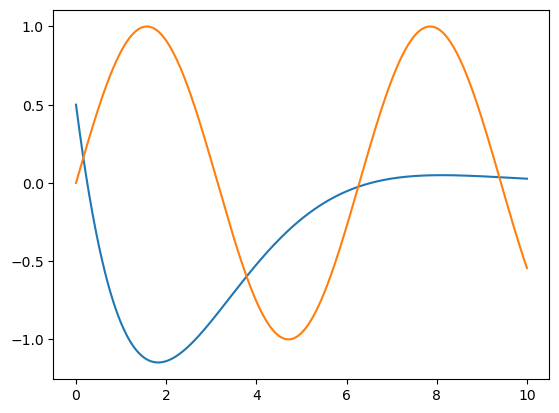

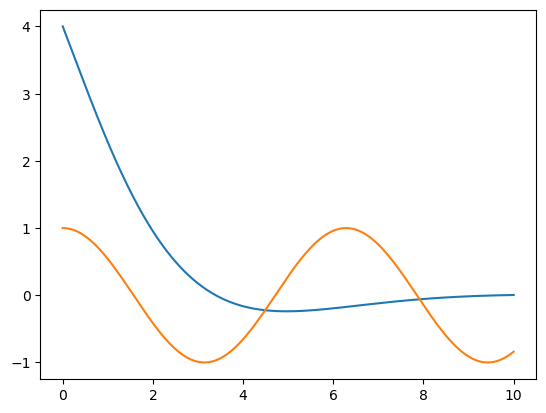

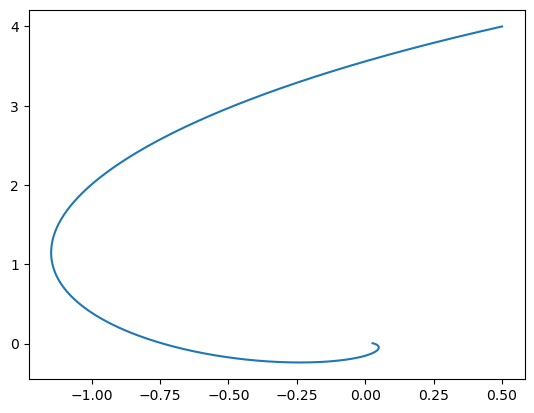

In [4]:
N = 1000
h = 0.01
def f2(t,y, alpha = 0.5):
    return np.array([-alpha *(y[0]+ y[1]), alpha*(y[0] -y[1])])
y = np.zeros((2,N))
y[:,0]= np.array([0.5,4])
t = np.linspace(0, h*N, N)
for i in range(N-1):
    y[:,i+1]= heun(f2, t[i], y[:,i], h)
y_eksakt = np.array([np.sin(t), np.cos(t)])

plt.plot(t, y[0], label = 'y0_num')
plt.plot(t, y_eksakt[0], label = 'y0_eksakt')
plt.figure()

plt.plot(t, y[1], label = 'y1_num')
plt.plot(t, y_eksakt[1], label = 'y1_eksakt')
plt.figure()
plt.plot(y[0], y[1], label = 'plot av (y0, y1)')


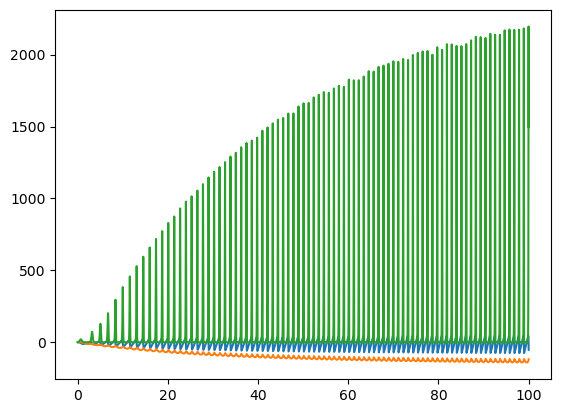

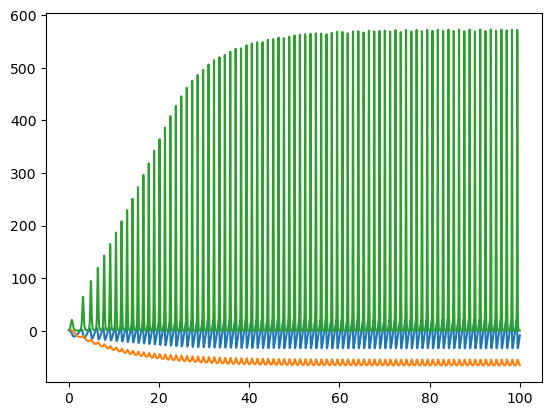

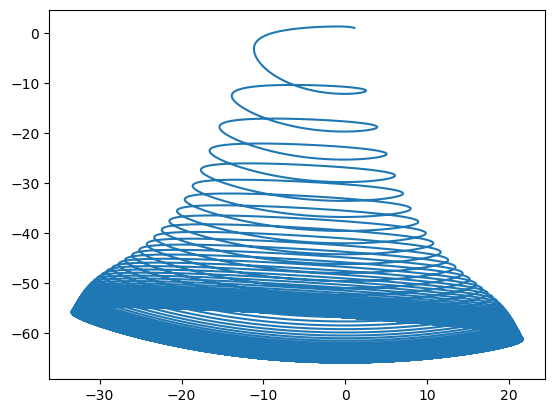

In [5]:
h = 0.01
t0= 0;tend = 100;
N = int((tend - t0)/h)
t = np.linspace(0, tend, N)

def f3(t,y):
    return np.array([y[0]*(y[1]-2), y[1]*(1-y[0])])

def f4(t,y):
    a =  0.1
    b = 0.1
    c = 5.7
    return np.array([-y[1] - y[2], y[0] + a*y[2], b + y[2]*(y[0] + c)])

y = np.zeros((3,N))
y[:,0] = np.array([1.1, 1.04, 0.99])
for i in range(N-1):
    y[:,i+1] = euler(f4, t[i], y[:, i], h)
plt.plot(t,y[0])
plt.plot(t,y[1])
plt.plot(t,y[2])

for i in range(N-1):
    y[:,i+1] = heun(f4, t[i], y[:, i], h)

plt.figure()
plt.plot(t,y[0])
plt.plot(t,y[1])
plt.plot(t,y[2])

for i in range(N-1):
    y[:,i+1] = rk3(f4, t[i], y[:, i], h)

plt.figure()
plt.plot(y[0], y[1])



In [6]:

def newton(function, derivative, roots, guess, tol): 
    root = roots[0]
    guesses = []
    while(abs(guess-root) > tol):
        guess = guess - function(guess, roots)/derivative(guess, roots)
        root = roots[np.argmin(abs(roots - guess))]
    
    return guess

def func(z, roots):
    return (z - roots[0])*(z - roots[1])*(z-roots[2])*(z - roots[3])
def dfunc(z, roots):
    return (z- roots[0])*(z-roots[1]) * (z - roots[3]) + (z-roots[0])*(z-roots[2])*(z - roots[3]) + (z - roots[1])*(z - roots[2])* (z - roots[3]) + (z - roots[1])*(z - roots[2])* (z - roots[0]) 

def polynomial(z, roots):
    poly = 1 + 0j
    for i in range(len(roots)):
        poly *= (z - roots[i])
    return poly

def diff_polynomial(z, roots):
    diff = 0 + 0j
    for i in range(len(roots)):
        diff += polynomial(z, np.delete(np.copy(roots), i))
    return diff


In [19]:
N = 1000
roots = np.array([-1 - 1j, 1 - 1j , -1 + 1j, 1 + 1j])
x = np.linspace(-2, 2, N)
y = np.linspace(-2j,2j, N)
color = np.zeros((N, N))
for i in range(len(x)):
    for j in range(len(y)):
        guess = newton(polynomial, diff_polynomial, roots, x[i] + y[j], 1e-10)
        #color_int = np.argmin(abs(roots - guess))
        color[i][j] = abs(guess)

[-1.-1.j  1.-1.j -1.+1.j  1.+1.j]
[1.41421356 1.41421356 1.41421356 1.41421356]


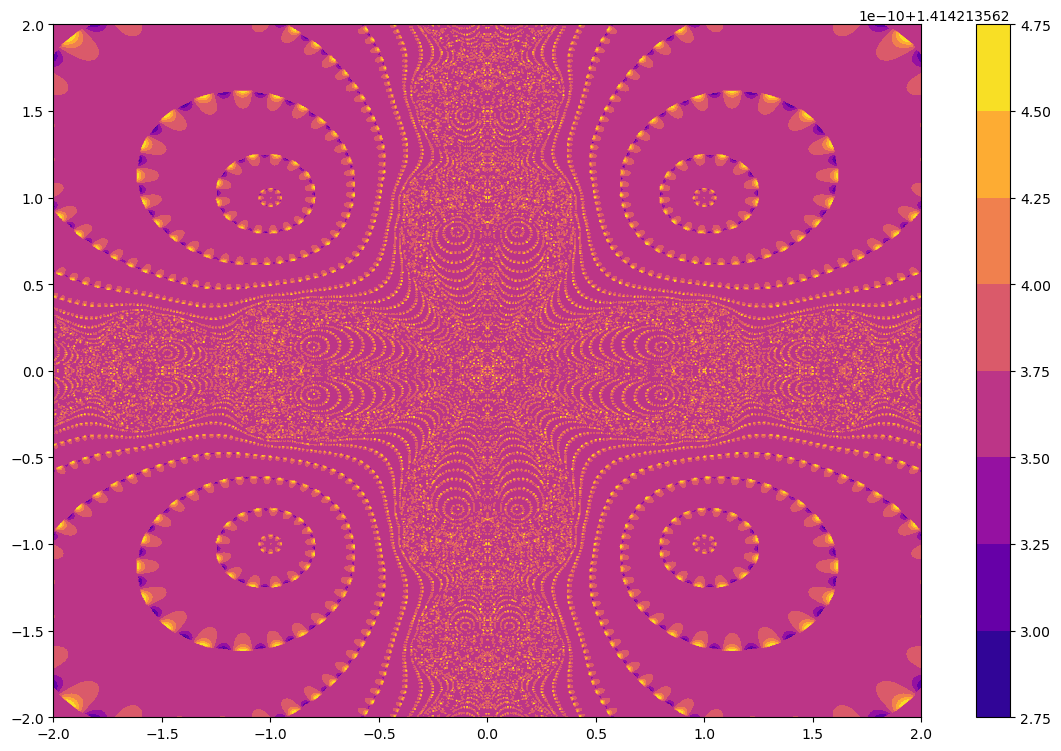

In [20]:
print(roots)
print(abs(roots))
plt.figure(figsize = (14,9))

plt.contourf(-x,-y.imag, color, cmap = plt.cm.plasma)

plt.colorbar()
plt.show()

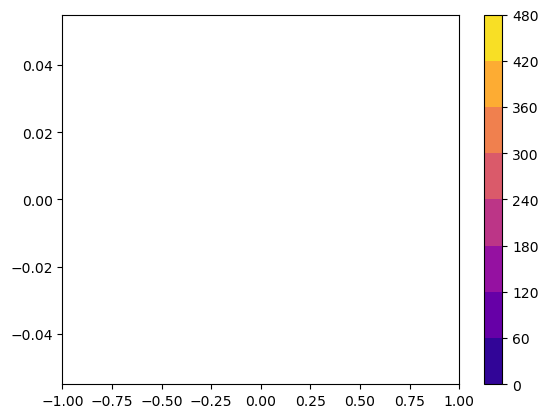

In [34]:
N = 500
roots = np.array([ 1/2 + np.sqrt(3)/2 * j, -1/2 + np.sqrt(3)/2 *j, 0])
x = np.linspace(-1, 1, N)
y = np.linspace(-j,j, N)
color = np.zeros((N, N))
for i in range(len(x)):
    for j in range(len(y)):
        guess = newton(polynomial, diff_polynomial, roots, x[i] + y[j], 1e-10)
        #color_int = np.argmin(abs(roots - guess))
        color[i][j] = abs(guess)


from matplotlib import cm
plt.contourf(-x,-y.imag, color, cmap = plt.cm.plasma)
plt.colorbar()
plt.show()

In [16]:
N = 500
roots = np.array([-3 - 3j, 3 - 3j, -3 +3j, 3 + 3j])
x = np.linspace(-5,5, N)
y = np.linspace(-5j,5j, N)
color = np.zeros((N, N))
plt.figure(figsize = (14,9))
for i in range(len(x)):
    for j in range(len(y)):
        guess = newton(polynomial, diff_polynomial, roots, x[i] + y[j], 1e-10)
        #color_int = np.argmin(abs(roots - guess))
        color[i][j] = abs(guess)

<Figure size 1400x900 with 0 Axes>

[-3.-3.j  3.-3.j -3.+3.j  3.+3.j]


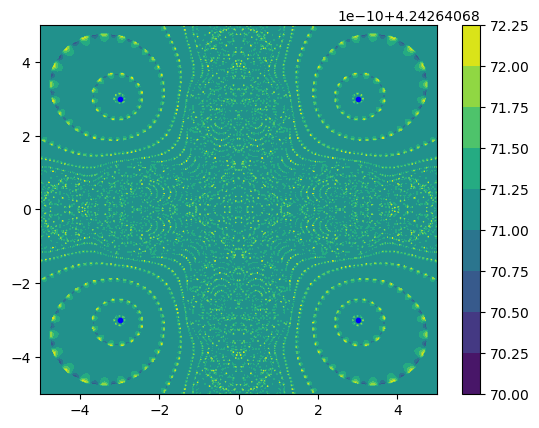

In [17]:
print(roots)

plt.plot(roots.real, roots.imag, '.b')
    
    
plt.contourf(-x,-y.imag, color)
plt.colorbar()

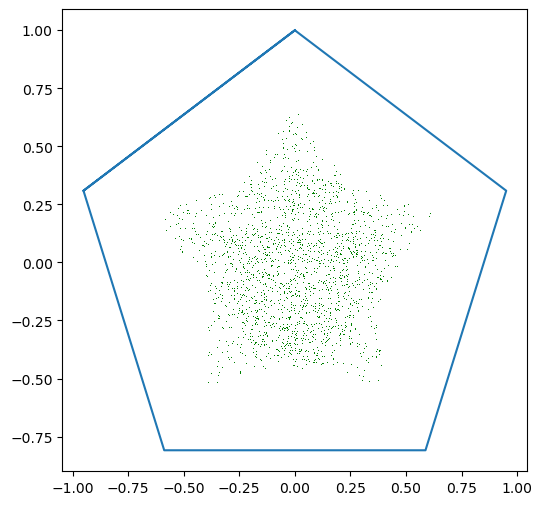

In [18]:
def sekskant(r):
    x = np.zeros(7)
    y = np.zeros(7)
    theta = np.pi/2
    for i in range(7):
        x[i] = r*np.cos(theta)
        y[i] = r*np.sin(theta)
        theta += 2*np.pi/5
    plt.figure(figsize = (6,6))
    plt.plot(x,y)
    return x,y
 
def fractal(r,N):
    x,y = sekskant(r)
    randx = np.random.uniform(-r,r, [N])
    randy = np.random.uniform(-r,r, [N])
    for i in range(N):
        index = np.argmin((x - randx[i])**2 + (y - randy[i])**2)
        plt.plot(2/3*(x[index]- randx[i]), 2/3*(y[index]-randy[i]), ',g')

fractal(1, 2000)